### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?


## Importing Required Packages

In [30]:
#import required packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler  # b/w 0 & 1
from sklearn.preprocessing import StandardScaler # scaled using unit variance
from sklearn.preprocessing import Normalizer # b/w -1 & +1 (l2)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset into DataFrame

In [2]:
#read data in dataframe
cols = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','BUZZ']
df = pd.read_csv('Twitter-Absolute-Sigma-500.data', header = None)
df.columns = cols
#check missing values
null_data = df[df.isnull().any(axis=1)]
print("missing values: ", len(null_data))
df.head()

missing values:  0


,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [3]:
df.iloc[:,-1].value_counts()

0.0    112932
1.0     27775
Name: BUZZ, dtype: int64

### Imbalanced Dataset
The number of '1's is very less than the number of '0's

### REDUCING DATASET SIZE to 10%
For easy computation

In [59]:
_, sample_data, _, sample_target = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], shuffle = True, test_size = 0.1)
print(sample_data.shape, sample_target.shape)

(14071, 77) (14071,)


#X=sample_data[0:100]
#y=sample_target[0:100]
print(X.shape, y.shape)

### SCALING & SPLITTING TRAIN TEST SPLIT for computational ease
We use MinMaxScaler to bring all attributes into the range of 0-1 and also for relative computation ease compared to Normalizer (L1 & L2)

In [61]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(sample_data))
X_train, X_test, y_train, y_test = train_test_split(X, sample_target, random_state = 0, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11256, 77) (2815, 77) (11256,) (2815,)


### KNN Classifier
The k-NN classifcation algorithm is among the simplest machine learning algorithms where an object is classified by a majority vote of its neighbors based on the k closest training examples in the feature space.

In [62]:
param_grid = {'n_neighbors': list(range(1,11))}
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
train_score_array = []
test_score_array = []

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best Parameters : {}".format(grid_search.best_params_))
print("Best cross validation score : {}".format(grid_search.best_score_))

Best Parameters : {'n_neighbors': 10}
Best cross validation score : 0.9807120743177823


In [64]:
knn_acc_train = grid_search.best_estimator_.score(X_train, y_train)
knn_acc_test = grid_search.best_estimator_.score(X_test, y_test)
knn_auc_train = roc_auc_score(y_train,grid_search.predict(X_train))
knn_auc_test = roc_auc_score(y_test,grid_search.predict(X_test))

print('KNN Classifier: Train Accuracy: %.2f'%knn_acc_train)
print('KNN Classifier: Test Accuracy: %.2f '%knn_acc_test)

print('KNN Classifier: Train roc_auc_score: %.2f'%knn_auc_train)
print('KNN Classifier: Test roc_auc_score: %.2f '%knn_auc_test)

KNN Classifier: Train Accuracy: 0.97
KNN Classifier: Test Accuracy: 0.96 
KNN Classifier: Train roc_auc_score: 0.94
KNN Classifier: Test roc_auc_score: 0.92 


,n_neighbors
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


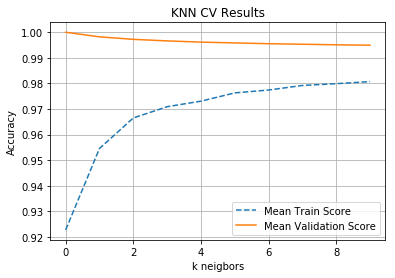

In [65]:
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_test_score'])), grid_search.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_train_score'])), grid_search.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('k neigbors')
plt.ylabel('Accuracy')
plt.title('KNN CV Results')
pd.DataFrame(grid_search.cv_results_['params'])

### LOGISTIC REGRESSION
Logistic Regression works with binary data, where either there is a BUZZ (1) or not (0).
This model is based on the probability of an event occurring.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

param_grid = {'penalty' : ['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
log_grid = GridSearchCV(LogisticRegression(random_state = 0), param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
log_grid.fit(X_train, y_train)
print("Best Params : {}".format(log_grid.best_params_))
print("Best cross validation score : {}".format(log_grid.best_score_))

Best Params : {'C': 10, 'penalty': 'l1'}
Best cross validation score : 0.9926316308048907


In [67]:
log_reg_acc_train = log_grid.best_estimator_.score(X_train, y_train)
log_reg_acc_test = log_grid.best_estimator_.score(X_test, y_test)
log_reg_auc_train = roc_auc_score(y_train,log_grid.predict(X_train))
log_reg_auc_test = roc_auc_score(y_test,log_grid.predict(X_test))

print('Logistic Regression: Train Accuracy: %.2f'%log_reg_acc_train)
print('Logistic Regression: Test Accuracy: %.2f '%log_reg_acc_test)
print('Logistic Regression: Train roc_auc_score: %.2f'%log_reg_auc_train)
print('Logistic Regression: Test roc_auc_score: %.2f '%log_reg_auc_test)

Logistic Regression: Train Accuracy: 0.97
Logistic Regression: Test Accuracy: 0.96 
Logistic Regression: Train roc_auc_score: 0.94
Logistic Regression: Test roc_auc_score: 0.93 


,C,penalty
0,0.001,l1
1,0.001,l2
2,0.010,l1
3,0.010,l2
4,0.100,l1
5,0.100,l2
6,1.000,l1
7,1.000,l2
8,10.000,l1
9,10.000,l2


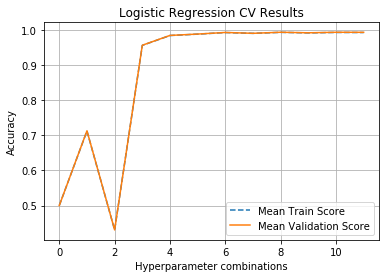

In [68]:
plt.plot(np.arange(0, len(log_grid.cv_results_['mean_test_score'])), log_grid.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(log_grid.cv_results_['mean_train_score'])), log_grid.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('Logistic Regression CV Results')
pd.DataFrame(log_grid.cv_results_['params'])

### SVC (LINEAR) KERNAL
The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data.

In [69]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100}
Best cross validation score: 0.99


In [70]:
svmlin_acc_train = grid_search.best_estimator_.score(X_train, y_train)
svmlin_acc_test = grid_search.best_estimator_.score(X_test, y_test)
svmlin_auc_train = roc_auc_score(y_train,grid_search.predict(X_train))
svmlin_auc_test = roc_auc_score(y_test,grid_search.predict(X_test))

print('Linear SVC - Train Accuracy: %.2f'%svmlin_acc_train)
print('Linear SVC - Test Accuracy: %.2f '%svmlin_acc_test)

print('Linear SVC - Train roc_auc_score: %.2f'%svmlin_auc_train)
print('Linear SVC - Test roc_auc_score: %.2f '%svmlin_auc_test)

Linear SVC - Train Accuracy: 0.97
Linear SVC - Test Accuracy: 0.96 
Linear SVC - Train roc_auc_score: 0.94
Linear SVC - Test roc_auc_score: 0.93 


,C
0,0.001
1,0.010
2,0.100
3,1.000
4,10.000
5,100.000


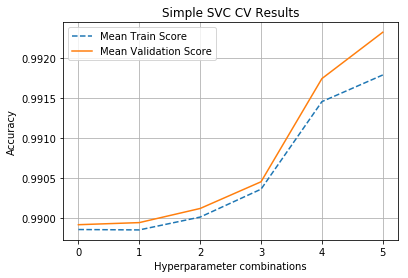

In [71]:
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_test_score'])), grid_search.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_train_score'])), grid_search.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('Simple SVC CV Results')
pd.DataFrame(grid_search.cv_results_['params'])

### SVC (RADIAL BASIS FUNCTION) KERNAL

In [72]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.99


In [73]:
svmrbf_acc_train = grid_search.best_estimator_.score(X_train, y_train)
svmrbf_acc_test = grid_search.best_estimator_.score(X_test, y_test)
svmrbf_auc_train = roc_auc_score(y_train,grid_search.predict(X_train))
svmrbf_auc_test = roc_auc_score(y_test,grid_search.predict(X_test))

,C,gamma
0,0.001,0.001
1,0.001,0.010
2,0.001,0.100
3,0.001,1.000
4,0.001,10.000
5,0.001,100.000
6,0.010,0.001
7,0.010,0.010
8,0.010,0.100
9,0.010,1.000


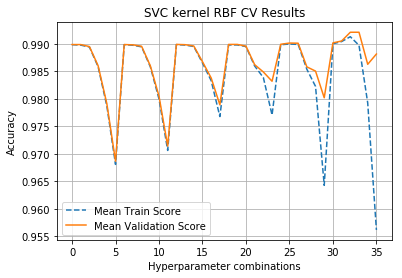

In [74]:
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_test_score'])), grid_search.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_train_score'])), grid_search.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('SVC kernel RBF CV Results')
pd.DataFrame(grid_search.cv_results_['params'])

### SVC (POLYNOMIAL) KERNAL

In [75]:
#POLYNOMIAL KERNAL
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1,2,3,4]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4]}
Best parameters: {'C': 100, 'degree': 1}
Best cross-validation score: 0.99


In [76]:
svmpoly_acc_train = grid_search.best_estimator_.score(X_train, y_train)
svmpoly_acc_test = grid_search.best_estimator_.score(X_test, y_test)
svmpoly_auc_train = roc_auc_score(y_train,grid_search.predict(X_train))
svmpoly_auc_test = roc_auc_score(y_test,grid_search.predict(X_test))

print('Polynomial SVC - Train Accuracy: %.2f'%svmpoly_acc_train)
print('Polynomial SVC - Test Accuracy: %.2f '%svmpoly_acc_test)

print('Polynomial SVC - Train roc_auc_score: %.2f'%svmpoly_auc_train)
print('Polynomial SVC - Test roc_auc_score: %.2f '%svmpoly_auc_test)

Polynomial SVC - Train Accuracy: 0.96
Polynomial SVC - Test Accuracy: 0.95 
Polynomial SVC - Train roc_auc_score: 0.91
Polynomial SVC - Test roc_auc_score: 0.91 


,C,degree
0,0.001,1
1,0.001,2
2,0.001,3
3,0.001,4
4,0.010,1
5,0.010,2
6,0.010,3
7,0.010,4
8,0.100,1
9,0.100,2


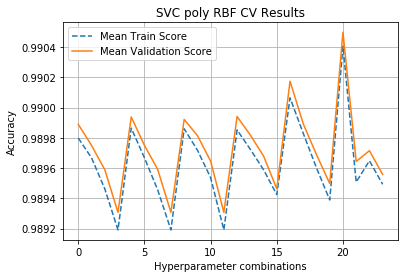

In [77]:
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_test_score'])), grid_search.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_train_score'])), grid_search.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('SVC poly RBF CV Results')
pd.DataFrame(grid_search.cv_results_['params'])

### DECISION TREE CLASSIFIER



In [78]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
grid_search= GridSearchCV( DecisionTreeClassifier(random_state = 0),param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best Parameters : {}".format(grid_search.best_params_))
print("Best cross_val score : {}".format(grid_search.best_score_))

Best Parameters : {'max_depth': 4}
Best cross_val score : 0.9827589559763269


In [79]:
tree_acc_train = grid_search.best_estimator_.score(X_train, y_train)
tree_acc_test = grid_search.best_estimator_.score(X_test, y_test)
tree_auc_train = roc_auc_score(y_train,grid_search.predict(X_train))
tree_auc_test = roc_auc_score(y_test,grid_search.predict(X_test))

print('Decision Tree - Train Accuracy: %.2f'%tree_acc_train)
print('Decision Tree - Test Accuracy: %.2f '%tree_acc_test)

print('Decision Tree - Train roc_auc_score: %.2f'%tree_auc_train)
print('Decision Tree - Test roc_auc_score: %.10f '%tree_auc_test)

Decision Tree - Train Accuracy: 0.97
Decision Tree - Test Accuracy: 0.96 
Decision Tree - Train roc_auc_score: 0.95
Decision Tree - Test roc_auc_score: 0.9420626550 


,max_depth
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


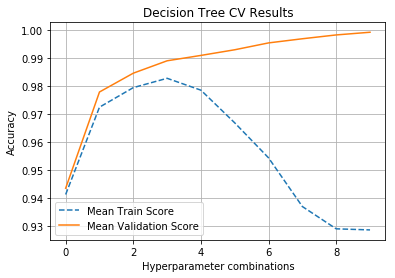

In [80]:
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_test_score'])), grid_search.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_train_score'])), grid_search.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('Decision Tree CV Results')
pd.DataFrame(grid_search.cv_results_['params'])

### FINAL TABLE with Test & Train Scores

In [81]:
finaltable=pd.DataFrame(
    {'Model':['KNN','Logistic','SVM Linear','SVM RBF','SVM Polynomial','Decision Tree'],
     'Train Accuracy':[knn_acc_train,log_reg_acc_train,svmlin_acc_train,svmrbf_acc_train,svmpoly_acc_train,tree_acc_train],
     'Test Accuracy':[knn_acc_test,log_reg_acc_test,svmlin_acc_test,svmrbf_acc_test,svmpoly_acc_test,tree_acc_test],
     'ROC-AUC_Score-Train':[knn_auc_train,log_reg_auc_train,svmlin_auc_train,svmrbf_auc_train,svmpoly_auc_train,tree_auc_train],
     'ROC-AUC_Score-Test':[knn_auc_test,log_reg_auc_test,svmlin_auc_test,svmrbf_auc_test,svmpoly_auc_test,tree_auc_test]
                        })
finaltable

,Model,ROC-AUC_Score-Test,ROC-AUC_Score-Train,Test Accuracy,Train Accuracy
0,KNN,0.923026,0.936309,0.957371,0.967395
1,Logistic,0.934122,0.935813,0.963766,0.966596
2,SVM Linear,0.932808,0.936604,0.962700,0.967306
3,SVM RBF,0.930209,0.934751,0.961634,0.966862
4,SVM Polynomial,0.912234,0.907070,0.954529,0.957001
5,Decision Tree,0.942063,0.950697,0.964121,0.970238


The Dataset is unbalanced.
So, it is best practice to check the relevant ROC-AUC_Score.

### Best regressor is DECISION TREE

Splitting Total dataset into train and test and scaling with MinMaxScaler

In [82]:
X_trainfinal, X_testfinal,y_trainfinal,y_testfinal = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], random_state = 0,test_size=.2)
print(X_trainfinal.shape,X_testfinal.shape,y_trainfinal.shape,y_testfinal.shape)

(112565, 77) (28142, 77) (112565,) (28142,)


In [83]:
MMscaler= MinMaxScaler()
X_trainfinal = MMscaler.fit_transform(X_trainfinal)
X_testfinal = MMscaler.transform(X_testfinal)

### Implementing DECISION TREE MODEL on training dataset with Best parameters (from Grid Search)

In [92]:
Treefinal = DecisionTreeClassifier(max_depth = 4, random_state = 0).fit(X_trainfinal, y_trainfinal)

In [93]:
final_accuracy_train = Treefinal.score(X_trainfinal, y_trainfinal)
final_accuracy_test = Treefinal.score(X_testfinal, y_testfinal)
final_auc_train = roc_auc_score(y_trainfinal,Treefinal.predict(X_trainfinal))
final_auc_test = roc_auc_score(y_testfinal,Treefinal.predict(X_testfinal))

print('Buzz Prediction Accuracy on Training Set: %.2f'%final_accuracy_train)
print('Buzz Prediction Accuracy on Test Set: %.2f '%final_accuracy_test)
print('Buzz Prediction ROC AUC Score on Training Set: %.2f'%final_auc_train)
print('Buzz Prediction ROC AUC Score on Test Set: %.2f '%final_auc_test)

Buzz Prediction Accuracy on Training Set: 0.97
Buzz Prediction Accuracy on Test Set: 0.96 
Buzz Prediction ROC AUC Score on Training Set: 0.94
Buzz Prediction ROC AUC Score on Test Set: 0.94 


In [115]:
from sklearn.metrics import confusion_matrix

#from sklearn.tree import DecisionTreeClassifier
#Treefinal = DecisionTreeClassifier(max_depth=2).fit(X_trainfinal, y_trainfinal)
pred_tree = Treefinal.predict(X_testfinal)
print("Test score: {:.2f}".format(Treefinal.score(X_testfinal, y_testfinal)))
print("\nDecision tree Confusion Matrix:")
pd.DataFrame(confusion_matrix(y_testfinal, pred_tree), columns= ['Predicted: No', 'Predicted: Yes'], index= ['Actual: No', 'Actual: Yes'])

Test score: 0.96

Decision tree Confusion Matrix:


,Predicted: No,Predicted: Yes
Actual: No,22061,477
Actual: Yes,560,5044


# Conclusion
Decision Tree is the best classification algorithm to predict BUZZ with 96% accuracy.